<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana13/AjustesPoissonHipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

from scipy import integrate
from scipy.stats import poisson
from scipy.special import factorial

In [7]:
def Likelihood(mu,n,b,s):

  l = mu*s+b

  return np.exp(-l)*l**n/factorial(n)

In [21]:
n = np.array([0.])
b = np.array([0.])
s = np.array([1.])

In [22]:
mu = np.linspace(0,4,50)
Like = Likelihood(mu,n[0],b[0],s[0])#*Likelihood(mu,n[1],b[1],s[1])

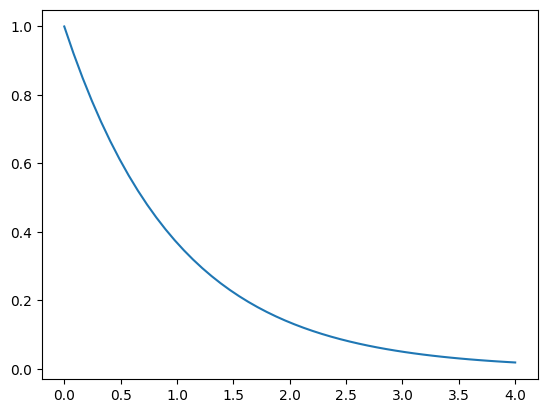

In [23]:
plt.plot(mu,Like)

In [24]:
def JointLikelihood(mu,n,b,s):

  Joint = 1.

  for i in range(len(n)):
    Joint *= Likelihood(mu,n[i],b[i],s[i])

  return Joint

In [25]:
probx = integrate.quad(JointLikelihood,0,np.inf,args=(n,b,s))[0]
probx

1.0000000000000002

In [26]:
integrate.quad(JointLikelihood,2.4,np.inf,args=(n,b,s))[0]/probx

0.0907179532894125